In [ ]:
#Import Library
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import joblib
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Read csv
df = pd.read_csv('https://raw.githubusercontent.com/saskiaapm/StuntZilla/main/Dataset/hasil_prediksi.csv')
# Display the first few rows of the DataFrame
print(df.head())

   Unnamed: 0    pidlink  tinggi_badan  berat_badan  jenis_kelamin  \
0           0    3070003     58.299999          4.9              0   
1           1    3070003     58.299999          4.9              0   
2           2  278120008           NaN        999.6              3   
3           3  180220007     68.000000          8.0              1   
4           4   33220006     70.000000          7.2              1   

   apakah_anak_minum_vitA_6bln_terakhir  apakah_anak_imunisasi_bcg  \
0                                   1.0                        NaN   
1                                   1.0                        NaN   
2                                   NaN                        NaN   
3                                   3.0                        NaN   
4                                   NaN                        NaN   

   apakah_anak_Imunisasi_polio  apakah_anak_imunisasi_dpt  \
0                          NaN                        NaN   
1                          NaN      

In [ ]:
df_baru=df[['apakah_bekerja_ibu', 'pendidikan_ibu', 'tinggi_badan_ibu', 'pengobatan_anemia', 'pengobatan_hipertensi', 'pengobatan_dm', 'usia_ibu_melahirkan', 'apakah_lahir_kembar', 'usia_kehamilan_saat_persalinan', 'prediksi']]

In [ ]:
# Merubah 'prediksi' menjadi kategorikal
df_baru['prediksi'] = df_baru['prediksi'].astype('category')
df_baru = df_baru.copy()
df_baru['prediksi'].replace(['Tidak Stunting', 'Stunting'], [0, 1], inplace=True)

<ipython-input-4-6dd64a3fa961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru['prediksi'] = df_baru['prediksi'].astype('category')


In [ ]:
# Merubah 'apakah_bekerja_ibu' menjadi kategorikal
df_baru = df_baru.copy()
df_baru['apakah_bekerja_ibu'].replace([1.0, 3.0], [1, 0], inplace=True)

In [ ]:
# Merubah 'pendidikan' menjadi kategorikal
df_baru = df_baru.copy()
df_baru['pendidikan_ibu'].replace([11,12, 13, 14, 15, 17, 60, 61, 62, 63, 72, 73, 74, 90, 95], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], inplace=True)

In [ ]:
# Merubah 'pengobatan_anemia' menjadi kategorikal
df_baru = df_baru.copy()
df_baru['pengobatan_anemia'].replace([1.0, 3.0], [1, 0], inplace=True)

In [ ]:
# Merubah 'pengobatan_hipertensi' menjadi kategorikal
df_baru = df_baru.copy()
df_baru['pengobatan_hipertensi'].replace([1.0, 3.0], [1, 0], inplace=True)

In [ ]:
# Merubah 'pengobatan_dm' menjadi kategorikal
df_baru = df_baru.copy()
df_baru['pengobatan_dm'].replace([1.0, 3.0], [1, 0], inplace=True)

In [ ]:
# Membulatkan semua kolom ke 2 desimal
df_baru['usia_ibu_melahirkan'] = df_baru['usia_ibu_melahirkan'].round(1)

In [ ]:
# Membulatkan semua kolom ke 2 desimal
df_baru['tinggi_badan_ibu'] = df_baru['tinggi_badan_ibu'].round(1)

In [ ]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   apakah_bekerja_ibu              179 non-null    float64 
 1   pendidikan_ibu                  290 non-null    float64 
 2   tinggi_badan_ibu                265 non-null    float64 
 3   pengobatan_anemia               174 non-null    float64 
 4   pengobatan_hipertensi           174 non-null    float64 
 5   pengobatan_dm                   174 non-null    float64 
 6   usia_ibu_melahirkan             278 non-null    float64 
 7   apakah_lahir_kembar             174 non-null    float64 
 8   usia_kehamilan_saat_persalinan  174 non-null    float64 
 9   prediksi                        293 non-null    category
dtypes: category(1), float64(9)
memory usage: 21.1 KB


In [ ]:
df_baru.describe()

,apakah_bekerja_ibu,pendidikan_ibu,tinggi_badan_ibu,pengobatan_anemia,pengobatan_hipertensi,pengobatan_dm,usia_ibu_melahirkan,apakah_lahir_kembar,usia_kehamilan_saat_persalinan
count,179.000000,290.000000,265.000000,174.000000,174.000000,174.0,278.000000,174.000000,174.000000
mean,0.296089,4.944828,261.189811,0.017241,0.005747,0.0,28.039568,2.954023,17.278563
std,0.457811,7.037988,1043.728229,0.130545,0.075810,0.0,6.442348,0.300598,13.577268
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,2.000000,1.000000,7.000000
25%,0.000000,2.000000,147.200000,0.000000,0.000000,0.0,23.000000,3.000000,9.000000
50%,0.000000,3.000000,150.800000,0.000000,0.000000,0.0,28.000000,3.000000,9.000000
75%,1.000000,5.000000,153.800000,0.000000,0.000000,0.0,32.000000,3.000000,35.750000
max,1.000000,98.000000,9996.000000,1.000000,1.000000,0.0,45.000000,3.000000,43.000000


In [ ]:
#Finding Missing Data
df_baru.isnull().sum()

apakah_bekerja_ibu                114
pendidikan_ibu                      3
tinggi_badan_ibu                   28
pengobatan_anemia                 119
pengobatan_hipertensi             119
pengobatan_dm                     119
usia_ibu_melahirkan                15
apakah_lahir_kembar               119
usia_kehamilan_saat_persalinan    119
prediksi                            0
dtype: int64

In [ ]:
# Menghapus baris yang mengandung missing value
df_bersih = df_baru.dropna()


print("DataFrame setelah menghapus baris yang mengandung missing value:")
print(df_bersih)


DataFrame setelah menghapus baris yang mengandung missing value:
     apakah_bekerja_ibu  pendidikan_ibu  tinggi_badan_ibu  pengobatan_anemia  \
3                   0.0             2.0             153.6                0.0   
5                   1.0             6.0             151.9                0.0   
9                   1.0            13.0             158.6                0.0   
10                  0.0             6.0             155.7                0.0   
13                  0.0            18.0             151.0                1.0   
..                  ...             ...               ...                ...   
288                 1.0             5.0             158.3                0.0   
289                 1.0             2.0             152.3                0.0   
290                 0.0             2.0             158.6                0.0   
291                 0.0             2.0             144.8                0.0   
292                 0.0            18.0             162

In [ ]:
# Menampilkan dataframe setelah imputasi
print(df_bersih.isna().sum())

apakah_bekerja_ibu                0
pendidikan_ibu                    0
tinggi_badan_ibu                  0
pengobatan_anemia                 0
pengobatan_hipertensi             0
pengobatan_dm                     0
usia_ibu_melahirkan               0
apakah_lahir_kembar               0
usia_kehamilan_saat_persalinan    0
prediksi                          0
dtype: int64


In [ ]:
#Checking the Dimension of dataset
df_bersih.shape

(168, 10)

In [ ]:
print("Jumlah duplikasi: ", df_bersih.duplicated().sum())

Jumlah duplikasi:  0


<ipython-input-19-fac6753844b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="prediksi", data=df_baru, palette="bwr")


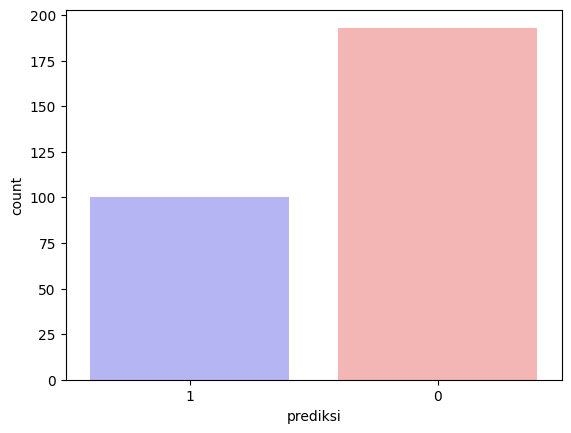

In [ ]:
# Data Exploration
# FOR LABEL
sns.countplot(x="prediksi", data=df_baru, palette="bwr")
plt.show()

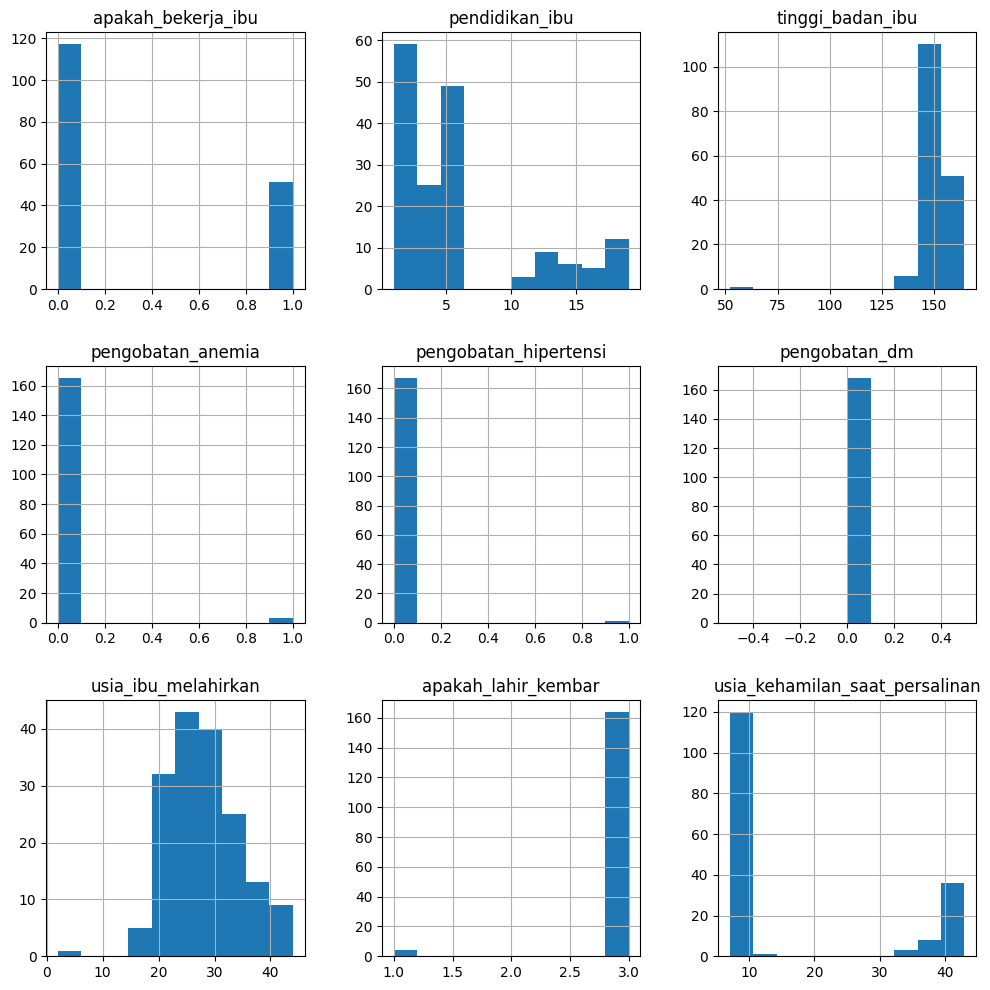

In [ ]:
# HISTOGRAM IN EACH VARIABLE
df_bersih.hist(figsize = (12, 12))
plt.show()

In [ ]:
# Pisahkan fitur (X) dan label (y)
X = df_bersih[['apakah_bekerja_ibu', 'pendidikan_ibu', 'tinggi_badan_ibu', 'pengobatan_anemia',
          'pengobatan_hipertensi', 'pengobatan_dm', 'usia_ibu_melahirkan', 'apakah_lahir_kembar',
          'usia_kehamilan_saat_persalinan']]
y = df_bersih['prediksi']

In [ ]:
# Enkode variabel kategorikal
le = LabelEncoder()
X['apakah_bekerja_ibu'] = le.fit_transform(X['apakah_bekerja_ibu'])
X['pendidikan_ibu'] = le.fit_transform(X['pendidikan_ibu'])
X['pengobatan_anemia'] = le.fit_transform(X['pengobatan_anemia'])
X['pengobatan_hipertensi'] = le.fit_transform(X['pengobatan_hipertensi'])
X['pengobatan_dm'] = le.fit_transform(X['pengobatan_dm'])
X['apakah_lahir_kembar'] = le.fit_transform(X['apakah_lahir_kembar'])

<ipython-input-22-5ab72206ff88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['apakah_bekerja_ibu'] = le.fit_transform(X['apakah_bekerja_ibu'])
<ipython-input-22-5ab72206ff88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pendidikan_ibu'] = le.fit_transform(X['pendidikan_ibu'])
<ipython-input-22-5ab72206ff88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Skala fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Oversample dataset menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Enkode ulang label setelah resampling
y_train_resampled = to_categorical(y_train_resampled)
y_test_one_hot = to_categorical(y_test)

In [ ]:
input_dim = X_train_resampled.shape[1]
num_classes = y_train_resampled.shape[1]

In [ ]:
# Membuat model dengan penambahan BatchNormalization dan Dropout lebih tinggi
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))  # Model lebih sederhana
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 64)                640       
                                                                 
 batch_normalization_10 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_58 (Dropout)        (None, 64)                0         
                                                                 
 dense_108 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_11 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dropout_59 (Dropout)        (None, 32)              

In [ ]:
# Menghitung bobot kelas
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [ ]:
history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32, validation_data=(X_test, y_test_one_hot), class_weight=class_weights_dict, callbacks=[reduce_lr])

Epoch 1/100
6/6 [==============================] - 0s 19ms/step - loss: 0.7429 - accuracy: 0.7031 - val_loss: 1.1753 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6971 - accuracy: 0.7292 - val_loss: 1.1762 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.7280 - accuracy: 0.7292 - val_loss: 1.1750 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 0.7296 - accuracy: 0.6875 - val_loss: 1.1683 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 0.7889 - accuracy: 0.6719 - val_loss: 1.1730 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7624 - accuracy: 0.6719 - val_loss: 1.1798 - val_accuracy: 0.4118 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.7898 - acc

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print("Akurasi:", accuracy)

2/2 [==============================] - 0s 8ms/step - loss: 1.0037 - accuracy: 0.4412
Akurasi: 0.44117647409439087


In [ ]:
# Prediksi menggunakan data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

2/2 [==============================] - 0s 6ms/step


In [ ]:
# Evaluasi model
print("Laporan Klasifikasi:\n", classification_report(y_test_classes, y_pred_classes))
print("Matriks Kebingungan:\n", confusion_matrix(y_test_classes, y_pred_classes))

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.73      0.42      0.54        26
           1       0.21      0.50      0.30         8

    accuracy                           0.44        34
   macro avg       0.47      0.46      0.42        34
weighted avg       0.61      0.44      0.48        34

Matriks Kebingungan:
 [[11 15]
 [ 4  4]]


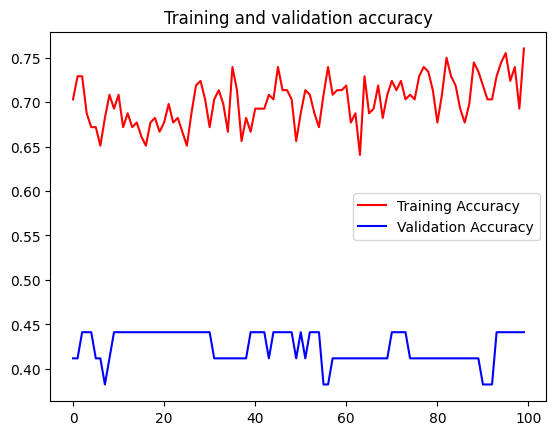

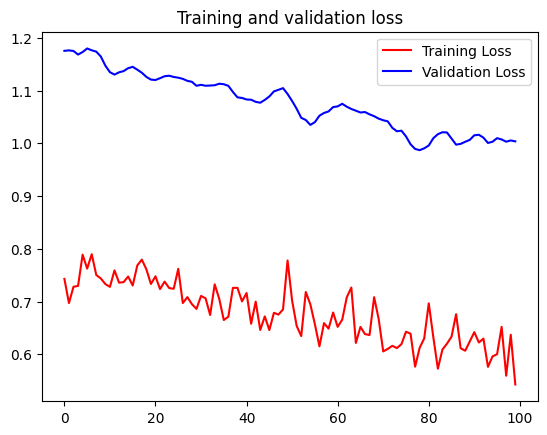

In [ ]:
# Plotting akurasi dan loss selama pelatihan
# Retrieve a list of list results on training and test data sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()  # Add legend to the plot
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()  # Add legend to the plot
plt.show()

In [ ]:
prediction = model.predict(np.array([[1, 11, 1.5, 3.3, 7.5, 70, 0]]))
# Fungsi untuk mengubah hasil prediksi menjadi kalimat "Yes" atau "No"
def predict_result(prediction):
    if prediction == 1:
        return "Yes"
    else:
        return "No"

# Menghasilkan kalimat berdasarkan hasil prediksi
result = predict_result(prediction)

print(result)